In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


df = pd.read_excel("REM_Fullbase_No_Names.xlsx") #считываю инф с файла


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 26 columns):
VypYear           234 non-null int64
DD                234 non-null int64
BestStud          234 non-null int64
BestIndProj       234 non-null int64
BestGroupProj     234 non-null int64
SrBall            234 non-null float64
Target_Class      234 non-null int64
GraduStepen       230 non-null object
Company           208 non-null object
PostYear          102 non-null object
IPName            232 non-null object
Superviser        232 non-null object
abitid            234 non-null int64
AnkData           234 non-null datetime64[ns]
borndate          234 non-null datetime64[ns]
Vozrast           234 non-null int64
Cityname          234 non-null object
Universityname    234 non-null object
Facultyname       234 non-null object
graduateyear      234 non-null object
averagemark       234 non-null float64
englishmark       234 non-null float64
sex               234 non-null int64
marriagesta

In [3]:
#привожу в порядок типы данных

df = df.drop(['BestStud', 'BestIndProj', 'BestGroupProj', 'GraduStepen', 'Company', 'PostYear', 'IPName', 'Superviser',
             'graduateyear'], axis=1) 

#df['DD'] = df.DD.astype('bool')
#df['BestStud'] = df.BestStud.astype('bool')
#df['BestIndProj'] = df.BestIndProj.astype('bool')
#df['BestGroupProj'] = df.BestGroupProj.astype('bool')
#df['sex'] = df.sex.astype('bool')
#df['marriagestatus'] = df.marriagestatus.astype('bool')
#df['selfpiad'] = df.selfpiad.astype('bool')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
VypYear           234 non-null int64
DD                234 non-null int64
SrBall            234 non-null float64
Target_Class      234 non-null int64
abitid            234 non-null int64
AnkData           234 non-null datetime64[ns]
borndate          234 non-null datetime64[ns]
Vozrast           234 non-null int64
Cityname          234 non-null object
Universityname    234 non-null object
Facultyname       234 non-null object
averagemark       234 non-null float64
englishmark       234 non-null float64
sex               234 non-null int64
marriagestatus    234 non-null int64
ifwork            234 non-null int64
selfpiad          234 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(9), object(3)
memory usage: 31.2+ KB


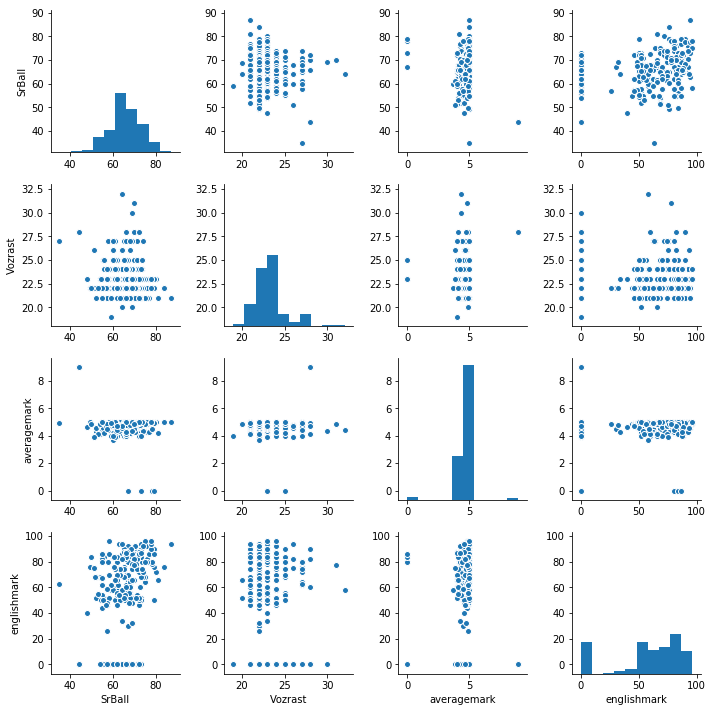

In [64]:
# c svg pairplot браузер начинает тормозить
import seaborn as sns


%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['SrBall', 'Vozrast', 'averagemark', 'englishmark']]);


In [65]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# университет и средний балл
data = []

for Universityname in df.Universityname.unique():
    data.append(
        go.Box(y=df[df.Universityname==Universityname].SrBall, name=Universityname)
    )

iplot(data, show_link = False)

# год выпуска и возраст
data = []

for VypYear in df.VypYear.unique():
    data.append(
        go.Box(y=df[df.VypYear==VypYear].Vozrast, name=VypYear)
    )

iplot(data, show_link = False)

# год выпуска и средний балл

data = []

for VypYear in df.VypYear.unique():
    data.append(
        go.Box(y=df[df.VypYear==VypYear].SrBall, name=VypYear)
    )
iplot(data, show_link = False)

# пол и группа

x0 = df.SrBall[df['sex'] == True]
x1 = df.SrBall[df['sex'] == False]


trace1 = go.Histogram(
    x=x0,
    name='Male',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Female',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

# работает и группа

x0 = df.SrBall[df['ifwork'] == True]
x1 = df.SrBall[df['ifwork'] == False]


trace1 = go.Histogram(
    x=x0,
    name='Work',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='NotWork',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

# самфин и группа

x0 = df.SrBall[df['selfpiad'] == True]
x1 = df.SrBall[df['selfpiad'] == False]


trace1 = go.Histogram(
    x=x0,
    name='СамПлатит',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='НеПлатит',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

In [4]:
#tree vs knn

y = df['Target_Class']
df.drop(['VypYear', 'SrBall', 'Target_Class', 'abitid', 'AnkData', 'borndate'], axis=1, inplace=True)
#df.drop(['VypYear', 'Target_Class', 'abitid', 'AnkData', 'borndate'], axis=1, inplace=True)

In [5]:
#one hot encoding for strings
df = pd.get_dummies(data=df, columns =['Cityname', 'Universityname', 'Facultyname'] )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 136 entries, DD to Facultyname_Экономический
dtypes: float64(2), int64(6), uint8(128)
memory usage: 44.0 KB


In [7]:
df

,DD,Vozrast,averagemark,englishmark,sex,marriagestatus,ifwork,selfpiad,Cityname_Архангельск,Cityname_Астрахань,...,Facultyname_Строительный,Facultyname_Технология конструкционных материалов,Facultyname_ФТИ,Facultyname_Физико-технический,Facultyname_Физико-технический факультет,Facultyname_Физический,Facultyname_Химико-технологический,Facultyname_Химический,Facultyname_Химической технологии неорганических веществ,Facultyname_Экономический
0,0,24,4.80,52.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,20,4.90,52.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,24,5.00,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,24,4.20,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,22,4.20,52.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,23,4.50,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,21,4.20,60.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,21,4.60,52.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,21,4.70,52.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,23,4.86,66.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#делим выборку на обучающую и тестовую. Обучаем дерево и knn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [10]:
#оценка моделей

from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) 


0.57746478873239437

In [11]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.59154929577464788

In [12]:
#кросс-валидация
from sklearn.model_selection import GridSearchCV, cross_val_score

In [13]:
tree_params = {'max_depth': range(1,50),
'max_features': range(4,136)}

In [14]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [21]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6468 candidates, totalling 32340 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 6309 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 16809 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 31509 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 32340 out of 32340 | elapsed:   59.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 50), 'max_features': range(4, 136)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [22]:
tree_grid.best_params_

{'max_depth': 12, 'max_features': 39}

In [23]:
tree_grid.best_score_

0.73619631901840488

In [24]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.61971830985915488

In [32]:
data_feature_names = list(df.columns.values) #лист названий столбцов для визуалазиации дерева

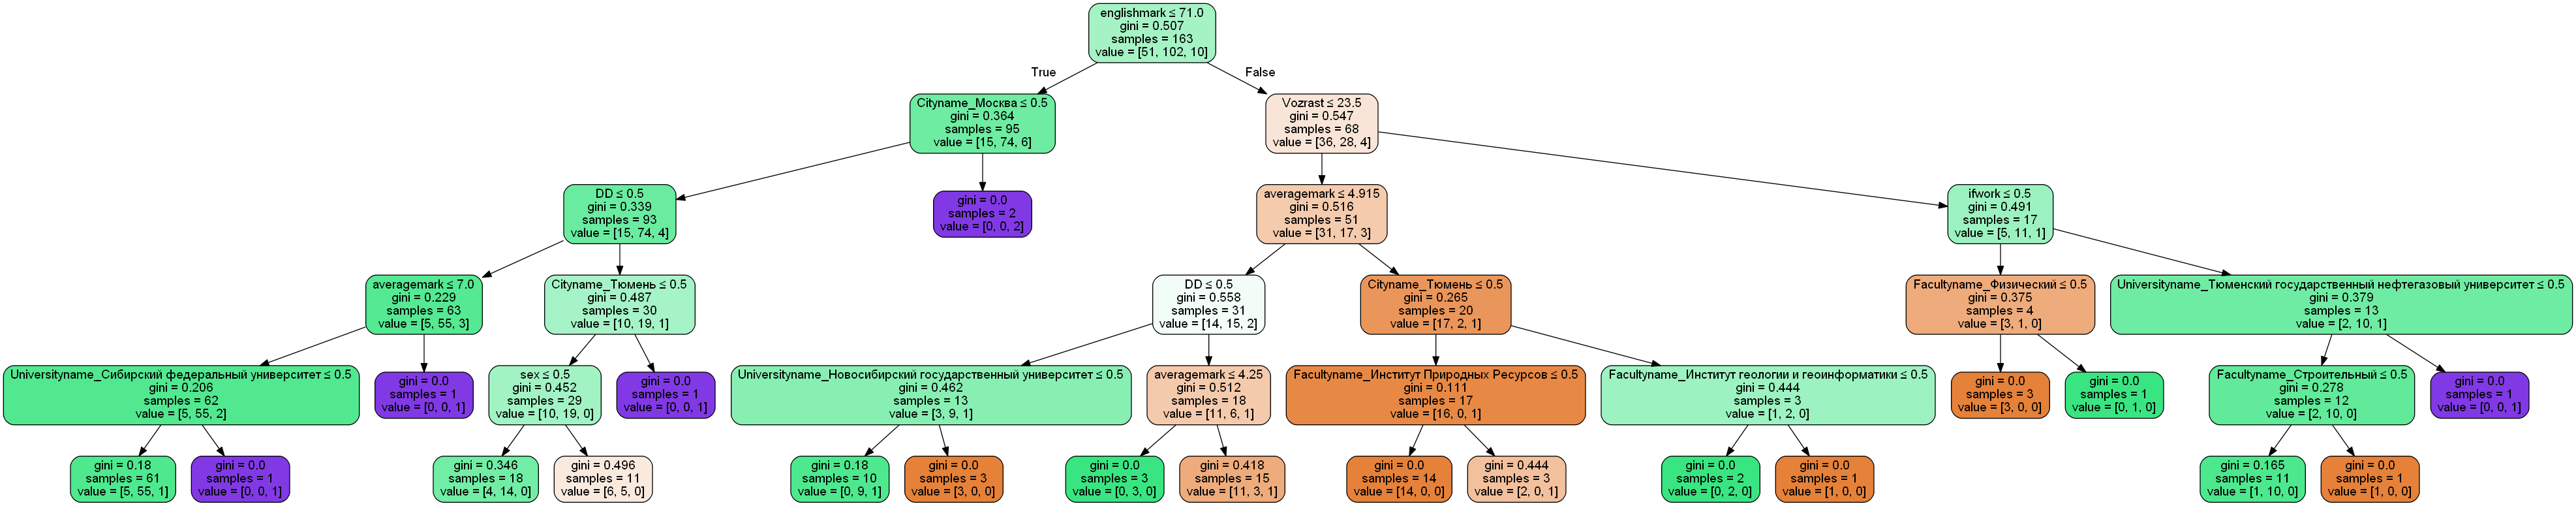

In [31]:
#визуализация дерева
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                feature_names=data_feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [95]:
knn_params = {'knn__n_neighbors': range(1, 50)}

In [96]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [97]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   39.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [98]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 49}, 0.6380368098159509)

In [99]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.60563380281690138